In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from finsim.data import get_yahoofinance_data

from lppl.fit import LPPLModel

In [2]:
symdf = get_yahoofinance_data('^GSPC', '2017-01-01', '2018-10-09')

[*********************100%***********************]  1 of 1 completed


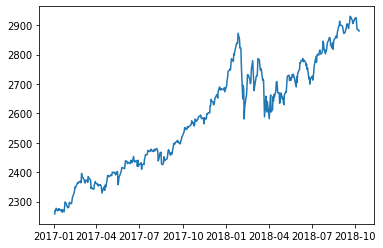

In [3]:
plt.plot(symdf['TimeStamp'], symdf['Close'])

In [4]:
fitted_lppl_model = LPPLModel()
fitted_lppl_model.omega_lo = 6 / (24*3600.)
fitted_lppl_model.omega_hi = 13 / (24*3600.)
fitted_lppl_model.fit(symdf['TimeStamp'].map(lambda ts: ts.timestamp()), symdf['Close'])

/Users/stephenhky/opt/anaconda3/envs/finance/lib/python3.8/site-packages/lppl/fit.py:40: OptimizeWarning: Initial guess is not within the specified bounds
  sol = minimize(


In [5]:
print(fitted_lppl_model)

tc: 1539043200.9997592
m: 0.5008372874092987
omega: 0.00015046296296296297
A: 7.934445220150832
B: -39.52545762893987
C: 39.525575336177226
phi: -1.1277839924907522e-05


In [6]:
pd.Timestamp.fromtimestamp(fitted_lppl_model.tc)

Timestamp('2018-10-08 20:00:00.999759')

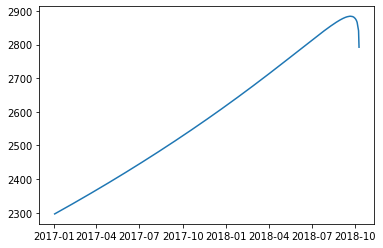

In [7]:
plt.plot(symdf['TimeStamp'], fitted_lppl_model(symdf['TimeStamp'].map(lambda ts: ts.timestamp())))

In [8]:
symdf['TimeStamp'].map(lambda ts: ts.timestamp()).map(lambda f: pd.Timestamp.fromtimestamp(f))

Date
2017-01-03   2017-01-02 19:00:00
2017-01-04   2017-01-03 19:00:00
2017-01-05   2017-01-04 19:00:00
2017-01-06   2017-01-05 19:00:00
2017-01-09   2017-01-08 19:00:00
                     ...        
2018-10-03   2018-10-02 20:00:00
2018-10-04   2018-10-03 20:00:00
2018-10-05   2018-10-04 20:00:00
2018-10-08   2018-10-07 20:00:00
2018-10-09   2018-10-08 20:00:00
Name: TimeStamp, Length: 446, dtype: datetime64[ns]